In [1]:
# Install specific compatible versions
!pip install numpy==1.23.5 pmdarima==2.0.4 --no-cache-dir



     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     --- ------------------------------------ 1.0/10.7 MB 7.2 MB/s eta 0:00:02
     --------- ------------------------------ 2.6/10.7 MB 6.3 MB/s eta 0:00:02
     -------------- ------------------------- 3.9/10.7 MB 6.3 MB/s eta 0:00:02
     ------------------- -------------------- 5.2/10.7 MB 6.4 MB/s eta 0:00:01
     ----------------------- ---------------- 6.3/10.7 MB 6.3 MB/s eta 0:00:01
     ---------------------------- ----------- 7.6/10.7 MB 6.3 MB/s eta 0:00:01
     --------------------------------- ------ 8.9/10.7 MB 6.3 MB/s eta 0:00:01
     ---------------------------------------  10.5/10.7 MB 6.4 MB/s eta 0:00:01
     ---------------------------------------- 10.7/10.7 MB 6.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "C:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
        File "C:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 137, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "C:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\pip\_vendor\pyprojec

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()


Saving SARIMAX.xlsx to SARIMAX (1).xlsx


In [2]:
df = pd.read_excel('SARIMAX.xlsx', index_col='Date', parse_dates=True)
df = df.asfreq('h')

<Axes: title={'center': 'Turbidity'}, xlabel='Date'>

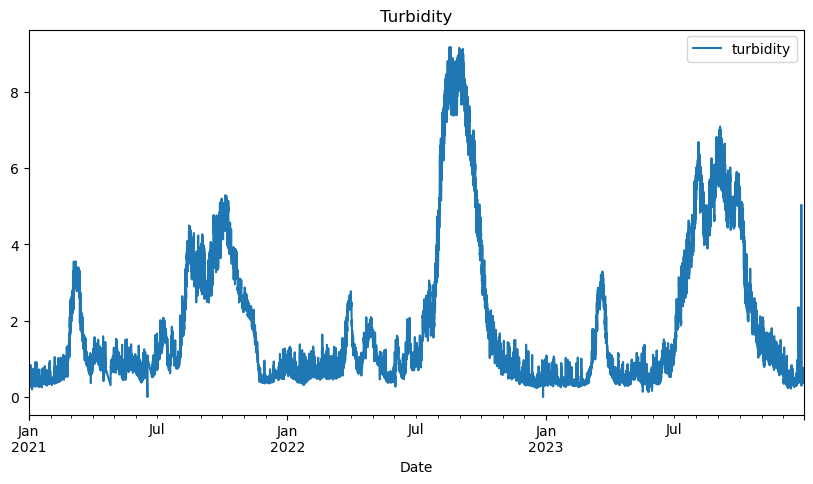

In [3]:
df['turbidity'].plot(title='Turbidity', figsize=(10, 5), legend=True)

In [4]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['turbidity'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')
# The p-value is less than 0.05, so we reject the null hypothesis and conclude that the time series is stationary.

ADF Statistic: -1.8648080235775646
p-value: 0.34879323482591773
Critical Values:
   1%: -3.4305996065332724
   5%: -2.8616503187533002
   10%: -2.5668287194080244


<Axes: title={'center': 'Turbidity and Differenced Turbidity'}, xlabel='Date'>

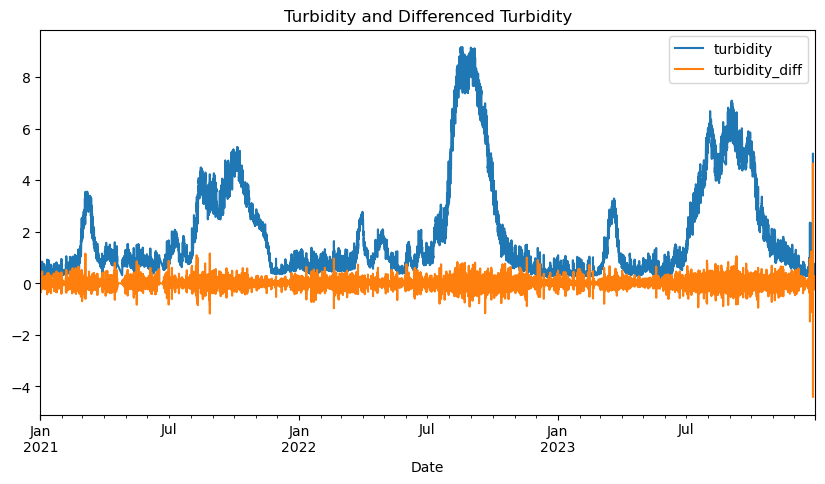

In [5]:
# difference the series
df['turbidity_diff'] = df['turbidity'].diff().dropna()

# plot the original and differenced series
df[['turbidity', 'turbidity_diff']].plot(title='Turbidity and Differenced Turbidity', figsize=(10, 5), legend=True)

In [6]:
adfuller_result = adfuller(df['turbidity_diff'].dropna())
print('ADF Statistic:', adfuller_result[0])
print('p-value:', adfuller_result[1])
print('Critical Values:')
for key, value in adfuller_result[4].items():
    print(f'   {key}: {value}')
# The p-value is less than 0.05, so we reject the null hypothesis and conclude that the differenced series is stationary.

ADF Statistic: -27.431776440873236
p-value: 0.0
Critical Values:
   1%: -3.4305996065332724
   5%: -2.8616503187533002
   10%: -2.5668287194080244


# ARIMA model

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [9]:
train

,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),turbidity,turbidity_diff
Date,,,,,,,
2020-12-31 15:00:00,4.0,78,9.8,0.391,55,0.430411,NaN
2020-12-31 16:00:00,3.4,85,5.6,0.391,25,0.522836,0.092425
2020-12-31 17:00:00,1.5,94,7.3,0.390,3,0.512069,-0.010766
2020-12-31 18:00:00,0.8,95,7.1,0.389,0,0.450545,-0.061524
2020-12-31 19:00:00,-0.1,97,8.4,0.388,0,0.405494,-0.045050
...,...,...,...,...,...,...,...
2023-05-25 10:00:00,15.0,64,15.8,0.246,352,0.229242,0.074710
2023-05-25 11:00:00,15.7,61,16.6,0.245,251,0.136613,-0.092629
2023-05-25 12:00:00,16.6,57,16.8,0.244,203,0.228651,0.092038


In [10]:
test

,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),turbidity,turbidity_diff
Date,,,,,,,
2023-05-25 15:00:00,16.6,61,17.7,0.242,198,0.413618,0.146450
2023-05-25 16:00:00,16.8,59,17.4,0.241,61,0.527081,0.113463
2023-05-25 17:00:00,17.0,56,17.1,0.240,109,0.518886,-0.008195
2023-05-25 18:00:00,16.8,55,16.4,0.239,98,0.481047,-0.037838
2023-05-25 19:00:00,16.4,59,13.4,0.239,25,0.452715,-0.028332
...,...,...,...,...,...,...,...
2023-12-30 05:00:00,6.9,90,21.5,0.399,0,0.455236,0.026392
2023-12-30 06:00:00,6.9,90,21.4,0.399,0,0.398240,-0.056996
2023-12-30 07:00:00,6.7,91,19.0,0.398,0,0.413984,0.015745


In [11]:
from pmdarima import auto_arima, ARIMA, model_selection

In [12]:
# using pmdarima for the arima model and the best parameters
model = auto_arima(train['turbidity'], seasonal=True)
model.summary()

c:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:               SARIMAX(4, 1, 3)   Log Likelihood               15546.595
Date:                Sun, 04 May 2025   AIC                         -31077.189
Time:                        02:21:54   BIC                         -31013.572
Sample:                    12-31-2020   HQIC                        -31056.425
                         - 05-25-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0100      5.456      0.002      0.999     -10.684      10.704
ar.L2          0.8357      0.852      0.980      0.327      -0.835       2.506
ar.L3         -0.1542      4.415     -0.035      0.972      -8.807       8.498
ar.L4          0.0022      0.105      0.021      0.983      -0.203       0.207
ma.L1         -0.1173      5.456     -0.022      0.983     -10.811      10.577
ma.L2         -0.9327      0.268     -3.486      0.000      -1.457      -0.408
ma.L3          0.1542      5.045      0.031      0.976      -9.734      10.042
sigma2         0.0133   5.74e-05    231.905      0.000       0.013       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             84455.57
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.60
Prob(H) (two-sided):                  0.70   Kurtosis:                        12.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# predictions
predictions_arima = model.predict(n_periods=len(test))
predictions_arima

c:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2023-05-25 15:00:00    0.276166
2023-05-25 16:00:00    0.286785
2023-05-25 17:00:00    0.291605
2023-05-25 18:00:00    0.299231
2023-05-25 19:00:00    0.301718
                         ...   
2023-12-30 05:00:00    0.322061
2023-12-30 06:00:00    0.322061
2023-12-30 07:00:00    0.322061
2023-12-30 08:00:00    0.322061
2023-12-30 09:00:00    0.322061
Freq: h, Length: 5251, dtype: float64

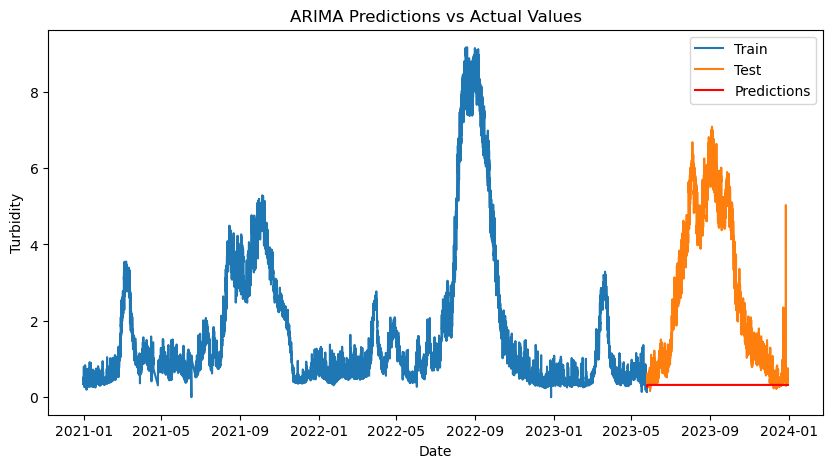

In [14]:
# plot the predictions against the actual values
plt.figure(figsize=(10, 5))
plt.plot(train['turbidity'], label='Train')
plt.plot(test['turbidity'], label='Test')
plt.plot(test.index, predictions_arima, label='Predictions', color='red')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.legend()
plt.show()

In [15]:
# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error
import numpy as np

# calculate the metrics
mse = mean_squared_error(test['turbidity'], predictions_arima)
mae = mean_absolute_error(test['turbidity'], predictions_arima)
mape = mean_absolute_percentage_error(test['turbidity'], predictions_arima)
r2 = r2_score(test['turbidity'], predictions_arima)
rmse = np.sqrt(mse)

# print the metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)
print('R2 Score:', r2)
print('Root Mean Squared Error:', rmse)
# The metrics indicate that the model is performing well, with a low MSE, MAE, and RMSE, and a high R2 score.

Mean Squared Error: 9.590318225897795
Mean Absolute Error: 2.3363529624787476
Mean Absolute Percentage Error: 0.723567395743187
R2 Score: -1.316663665902369
Root Mean Squared Error: 3.0968238932651295


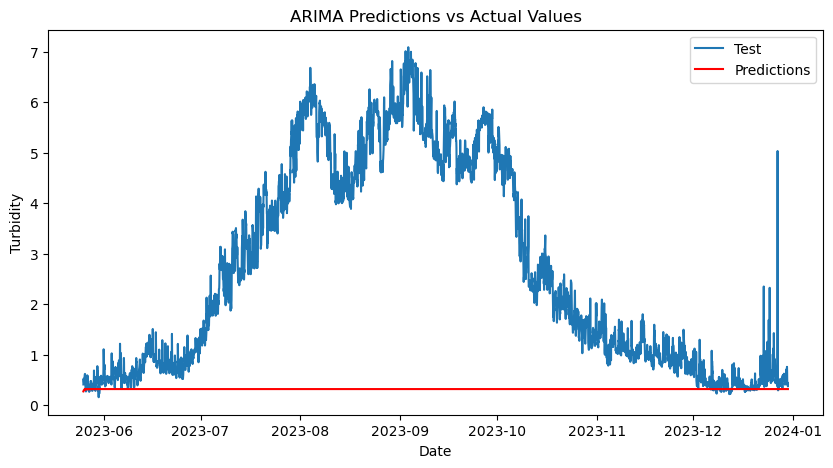

In [16]:
# plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(test['turbidity'], label='Test')
plt.plot(test.index, predictions_arima, label='Predictions', color='red')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.legend()
plt.show()